<a href="https://colab.research.google.com/github/Usama-alt1/ML/blob/web/News_Headlines_%2B_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
def scrape_dawn_headlines(section_url="https://www.dawn.com"):  # Default to homepage
    response = requests.get(section_url)
    soup = BeautifulSoup(response.text, "html.parser")
    headlines = []
    for tag in soup.find_all("h2", class_="story__title"):
        title = tag.get_text(strip=True)
        article_link = tag.find("a")["href"]  # Assuming headlines have links
        headlines.append({"title": title, "link": article_link})
    df = pd.DataFrame(headlines)
    return df

In [3]:
def analyze_sentiment(df):
    sentiments = []
    polarities = []

    for headline in df["Headline"]:
        blob = TextBlob(headline)
        polarity = blob.sentiment.polarity
        polarities.append(polarity)

        if polarity > 0:
            sentiments.append("Positive")
        elif polarity < 0:
            sentiments.append("Negative")
        else:
            sentiments.append("Neutral")

    df["Sentiment"] = [scores["compound"] for scores in sentiments]
    df["Positive"] = [scores["pos"] for scores in sentiments]
    df["Negative"] = [scores["neg"] for scores in sentiments]
    return df

In [4]:
!pip install nltk
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
# Instead of 'Headline', use a sample headline string
sample_headline = "Pakistan wins the cricket match."
sentiments = analyzer.polarity_scores(sample_headline)
print(sentiments)

{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(df):
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []
    positives = []
    negatives = []
    neutrals = []

    for headline in df["title"]:
        scores = analyzer.polarity_scores(headline)
        sentiments.append(scores)
        positives.append(scores['pos'])
        negatives.append(scores['neg'])
        neutrals.append(scores['neu'])

    df["Sentiment"] = sentiments
    df["Positive"] = positives  # Add Positive column
    df["Negative"] = negatives  # Add Negative column
    df["Neutral"] = neutrals  # Add Neutral column
    return df

In [12]:
def visualize_sentiment(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.countplot(x="Sentiment", data=df, palette="Set2")
    plt.title("Sentiment Distribution of Dawn Headlines")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

In [13]:
def visualize_sentiment(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.countplot(x="Sentiment", data=df, palette="Set2")
    plt.title("Sentiment Distribution of Dawn Headlines")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

In [14]:
import concurrent.futures
if __name__ == "__main__":
    urls = ["https://www.dawn.com", "https://www.dawn.com/business"]
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(scrape_dawn_headlines, urls))

    headlines_df_homepage = results[0]
    headlines_df_business = results[1]
    print("🧠 Analyzing sentiment...")

    analyzed_df = analyze_sentiment(headlines_df_homepage)

    print(analyzed_df.head())

    print("📊 Visualizing sentiment...")
    # visualize_sentiment(analyzed_df)

    print("💾 Saving analysis results...")
    analyzed_df.to_csv("dawn_sentiment_analysis.csv", index=False)


🧠 Analyzing sentiment...
                                               title  \
0                End of live blog for elections 2024   
1  Scrutiny concludes for nomination papers of 48...   
2        ECP notifies Mahmood Khan as PTI-P chairman   
3  No casualties reported as 5.5-magnitude quake ...   
4  Two bodies recovered after predawn attack on f...   

                                                link  \
0                       /live/elections-2024#1822566   
1                       /live/elections-2024#1822564   
2                       /live/elections-2024#1822561   
3  https://www.dawn.com/news/1903746/no-casualtie...   
4            https://www.dawn.com/live/gaza-invasion   

                                           Sentiment  Positive  Negative  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0     0.000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0     0.000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0     0.000 

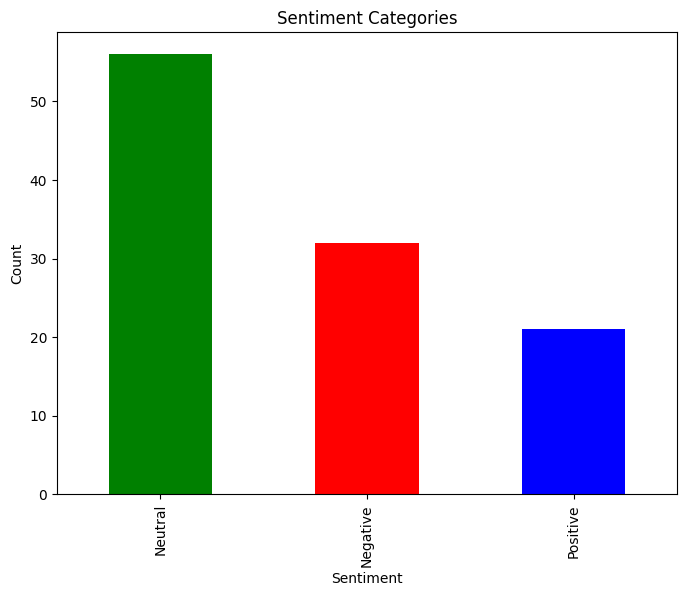

In [15]:
plt.figure(figsize=(8, 6))
sentiment_counts = analyzed_df['Sentiment'].apply(lambda x: 'Positive' if x['compound'] > 0 else 'Negative' if x['compound'] < 0 else 'Neutral').value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

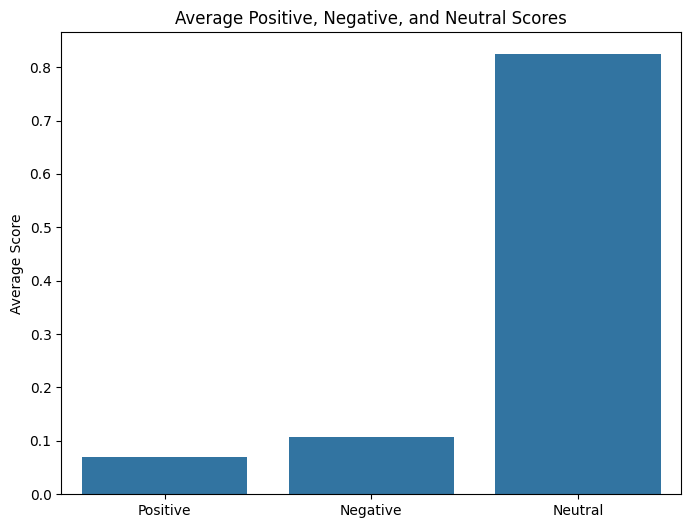

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Positive', 'Negative', 'Neutral'], y=[analyzed_df['Positive'].mean(), analyzed_df['Negative'].mean(), analyzed_df['Neutral'].mean()])
plt.title('Average Positive, Negative, and Neutral Scores')
plt.ylabel('Average Score')
plt.show()

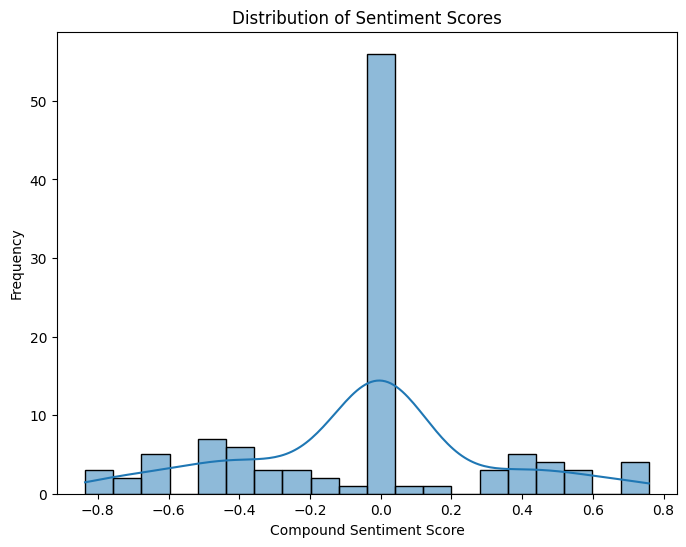

In [18]:
plt.figure(figsize=(8, 6))
# Extract compound scores from the 'Sentiment' column
compound_scores = analyzed_df['Sentiment'].apply(lambda x: x['compound'])
sns.histplot(compound_scores, bins=20, kde=True)  # Distribution of compound scores
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()